In [ ]:
# this is for jo
import os
os.chdir('../')

BEND DIST 100.0
waypoints [[ 15.5   0. ]
 [135.5   0. ]
 [135.5  81. ]
 [125.5  81. ]]


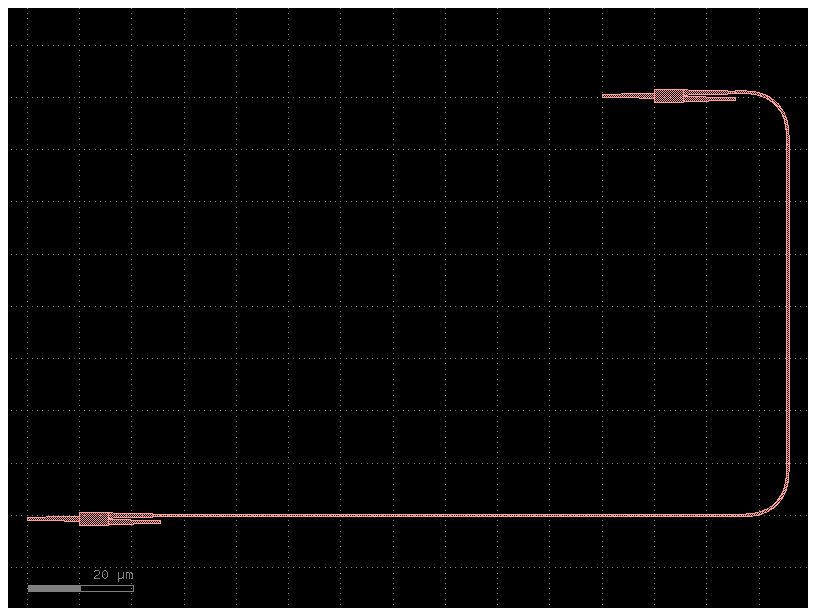

In [7]:
# Test Routing
from functools import partial
import gdsfactory as gf
from gdsfactory.cell import cell
from gdsfactory.component import Component
from gdsfactory.generic_tech import get_generic_pdk
from gdsfactory.port import Port

gf.config.rich_output()

c = gf.Component("sample_problem")
mmi1 = c << gf.components.mmi1x2()
mmi1.move((0, -0.625))
mmi2 = c << gf.components.mmi1x2()
mmi2.move((110, 80.375))

# rec = gf.Component("rectangle_polygon")
# rec.add_polygon(
#        [(-10, -10, 10, 10), (-10, 10, 10, -10)], layer=(1, 0)
#    )
# x = c << rec
# x.move((110, 10))
# #x.move((100, 50))

# rec2 = gf.Component("rectangle_polygon")
# rec2.add_polygon(
#        [(-10, -10, 10, 10), (-10, 10, 10, -10)], layer=(1, 0)
#    )
# x = c << rec2
# # x.move((130, 20))
# x.move((50, 80))

# rec3 = gf.Component("rectangle_polygon")
# rec3.add_polygon(
#        [(-10, -10, 10, 10), (-10, 10, 10, -10)], layer=(1, 0)
#    )
# x = c << rec3
# # x.move((130, 20))
# x.move((80, 40))
# # x.move((130, 50))
# # x.move((130, 5))

# rec2 = gf.Component("rectangle_polygon")
# rec2.add_polygon(
#        [(-5, -5, 5, 5), (-5, 5, 5, -5)], layer=(1, 0)
#    )
# y = c << rec2
# y.move((115, 30))

# route = gf.routing.get_route(mmi1.ports["o2"], mmi2.ports["o2"], component=c, component_margin=5)
route = gf.routing.get_route(mmi1.ports["o2"], mmi2.ports["o2"], component=c, component_margin=5)
c.add(route.references)
c.plot()

2024-04-24 22:42:58.719 | INFO     | gdsfactory.pdk:activate:309 - 'generic' PDK is now active
restricted area start
[array([[ 95.   ,  85.625],
       [110.   ,  85.875],
       [110.   ,  74.875],
       [ 95.   ,  75.125]]), array([[130.5 ,  85.75],
       [120.5 ,  85.5 ],
       [120.5 ,  86.5 ],
       [130.5 ,  86.25]]), array([[130.5 ,  74.5 ],
       [120.5 ,  74.25],
       [120.5 ,  75.25],
       [130.5 ,  75.  ]]), array([[110.   ,  74.125],
       [120.5  ,  74.125],
       [120.5  ,  86.625],
       [110.   ,  86.625]]), array([[ 5.  , 15.25],
       [20.  , 15.5 ],
       [20.  ,  4.5 ],
       [ 5.  ,  4.75]]), array([[40.5  , 15.375],
       [30.5  , 15.125],
       [30.5  , 16.125],
       [40.5  , 15.875]]), array([[40.5  ,  4.125],
       [30.5  ,  3.875],
       [30.5  ,  4.875],
       [40.5  ,  4.625]]), array([[20.  ,  3.75],
       [30.5 ,  3.75],
       [30.5 , 16.25],
       [20.  , 16.25]])]
restricted area end
generate_route_astar_points [(950, 856), (950,

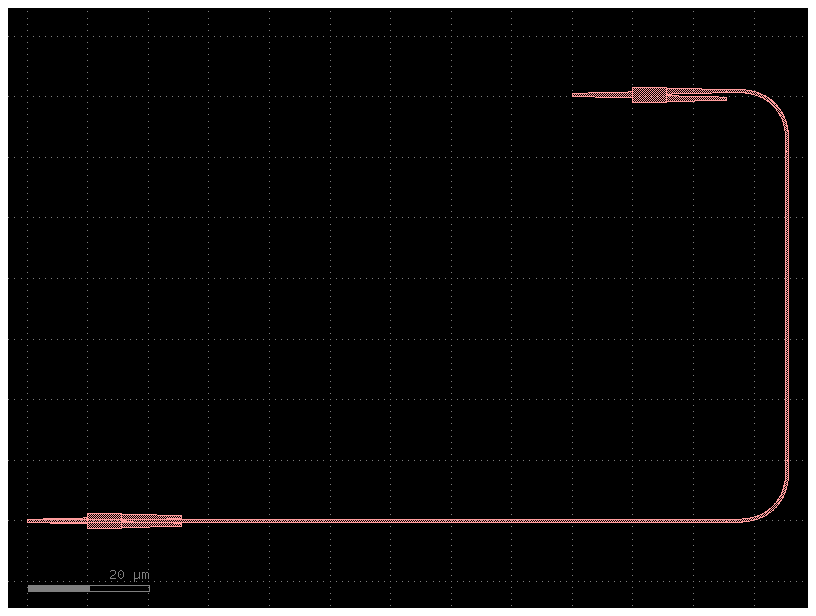

In [1]:
# Test Routing
from functools import partial
import gdsfactory as gf
from gdsfactory.cell import cell
from gdsfactory.component import Component
from gdsfactory.generic_tech import get_generic_pdk
from gdsfactory.port import Port

gf.config.rich_output()

c = gf.Component("sample_problem")
mmi1 = c << gf.components.mmi1x2()
#mmi1.move((0, -0.625))
mmi1.move((20, 10))
mmi2 = c << gf.components.mmi1x2()
mmi2.move((110, 80.375))

# rec = gf.Component("rectangle_polygon")
# rec.add_polygon(
#        [(-10, -10, 10, 10), (-10, 10, 10, -10)], layer=(1, 0)
#    )
# x = c << rec
# x.move((110, 10))
# #x.move((100, 50))

# rec2 = gf.Component("rectangle_polygon")
# rec2.add_polygon(
#        [(-10, -10, 10, 10), (-10, 10, 10, -10)], layer=(1, 0)
#    )
# x = c << rec2
# # x.move((130, 20))
# x.move((50, 80))

# rec3 = gf.Component("rectangle_polygon")
# rec3.add_polygon(
#        [(-10, -10, 10, 10), (-10, 10, 10, -10)], layer=(1, 0)
#    )
# x = c << rec3
# # x.move((130, 20))
# x.move((80, 40))
# # x.move((130, 50))
# # x.move((130, 5))

# rec2 = gf.Component("rectangle_polygon")
# rec2.add_polygon(
#        [(-5, -5, 5, 5), (-5, 5, 5, -5)], layer=(1, 0)
#    )
# y = c << rec2
# y.move((115, 30))

# route = gf.routing.get_route(mmi1.ports["o2"], mmi2.ports["o2"], component=c, component_margin=5)
route = gf.routing.get_route(mmi1.ports["o1"], mmi2.ports["o2"], component=c, component_margin=5)
c.add(route.references)
c.plot()

## get_bundle

To route groups of ports avoiding waveguide collisions, you should use `get_bundle` instead of `get_route`.

`get_bundle` uses a river/bundle/bus router.

At the moment it works only when each group of ports have the same orientation.


In [1]:
ys_right = [0, 10, 20, 40, 50, 80]
pitch = 127.0
N = len(ys_right)
ys_left = [(i - N / 2) * pitch for i in range(N)]
layer = (1, 0)

right_ports = [
    gf.Port(f"R_{i}", center=(0, ys_right[i]), width=0.5, orientation=180, layer=layer)
    for i in range(N)
]
left_ports = [
    gf.Port(f"L_{i}", center=(-200, ys_left[i]), width=0.5, orientation=0, layer=layer)
    for i in range(N)
]

# you can also mess up the port order and it will sort them by default
left_ports.reverse()

c = gf.Component(name="connect_bundle_v2")
routes = gf.routing.get_bundle(
    left_ports,
    right_ports,
    sort_ports=True,
    start_straight_length=100,
    enforce_port_ordering=False,
)
for route in routes:
    c.add(route.references)
c.plot()

NameError: name 'gf' is not defined